In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from pycountry import countries
import numpy as np
from plotly.subplots import make_subplots
import statsmodels.api as sm
import pingouin as pg


In [296]:
# Emissions data is CO2 emissions, traffic the total passengers, Tourism the Nights spent at tourist accommodation establishments, 
# and aviation the total freight and mail on board exported monthly

emissions = pd.read_csv('Datasets/emissions.csv')
traffic = pd.read_csv('Datasets/air_passengers.csv')
tourism = pd.read_csv('Datasets/tourism.csv')
supply = pd.read_csv('Datasets/aviation_freight.csv')

### Schiphol, Luxembourg

In [297]:
traffic_LU = traffic[
    (traffic['geo'] == 'LU') &
    (traffic['tra_meas'] == 'PAS_BRD') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

emissions_LU = emissions[
    (emissions['geo'] == 'LU_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

tourism_LU = tourism[
    (tourism['geo'] == 'LU') &
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02')
]

supply_LU = supply[
    (supply['geo'] == 'LU') &
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02')
]

In [298]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    subplot_titles=('Air passenger vs Emissions', 'Air passenger vs Tourism', 'Air passenger vs Freight'),
                    vertical_spacing=0.1,
                    specs=[[{'secondary_y': True}],
                           [{'secondary_y': True}],
                           [{'secondary_y': True}]])

# For Traffic vs Emissions
fig.add_trace(go.Scatter(
    x=traffic_LU['TIME_PERIOD'],
    y=traffic_LU['OBS_VALUE'],
    name='Air passenger',
    line=dict(color='blue'),
), row=1, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=emissions_LU['TIME_PERIOD'],
    y=emissions_LU['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
), row=1, col=1, secondary_y=False)

# For Traffic vs Tourism
fig.add_trace(go.Scatter(
    x=traffic_LU['TIME_PERIOD'],
    y=traffic_LU['OBS_VALUE'],
    showlegend=False,  
    line=dict(color='blue'),
), row=2, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=tourism_LU['TIME_PERIOD'],
    y=tourism_LU['OBS_VALUE'],
    name='Tourism',
    line=dict(color='red'),
), row=2, col=1, secondary_y=False)

# For Traffic vs Freight
fig.add_trace(go.Scatter(
    x=traffic_LU['TIME_PERIOD'],
    y=traffic_LU['OBS_VALUE'],
    showlegend=False, 
    line=dict(color='blue'),
), row=3, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=supply_LU['TIME_PERIOD'],
    y=supply_LU['OBS_VALUE'],
    name='Freight NL',
    line=dict(color='black'),
), row=3, col=1, secondary_y=False)

fig.update_layout(
    title_text='Impact of COVID-19 on Different Sectors in Luxembourg',
    height=900 
)

fig.add_vline(x='2020-02', line_width=2, line_color='red', line_dash='dot')
fig.add_annotation(
    dict(
        x='2020-02-01',
        y=1.05,  
        xref='x',
        yref='paper',
        text='Begin COVID-19',  
        showarrow=False,
        font=dict(
            family='Courier New, monospace',
            size=16,
            color='red'
        ),
        ax=0,  
        ay=0
    )
)

fig.show()


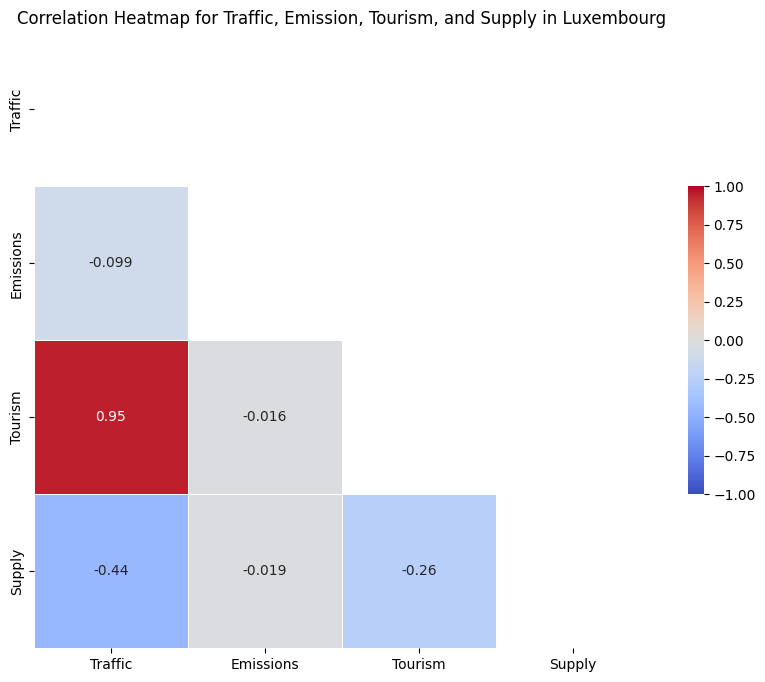

In [299]:
# Merge the dataframes based on the TIME_PERIOD column
merged_LU = traffic_LU[['TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Traffic'})
merged_LU = pd.merge(merged_LU, emissions_LU[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Emissions'})
merged_LU = pd.merge(merged_LU, tourism_LU[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Tourism'})
merged_LU = pd.merge(merged_LU, supply_LU[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Supply'})

corr = merged_LU.drop(columns='TIME_PERIOD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap for Traffic, Emission, Tourism, and Supply in Luxembourg')
plt.show()


### Poland


In [300]:
traffic_PL = traffic[
    (traffic['geo'] == 'PL') &
    (traffic['tra_meas'] == 'PAS_BRD') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

emissions_PL = emissions[
    (emissions['geo'] == 'PL_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

tourism_PL = tourism[
    (tourism['geo'] == 'PL') &
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02')
]

supply_PL = supply[
    (supply['geo'] == 'PL') &
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02')
]

In [301]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    subplot_titles=('Air passenger vs Emissions', 'Air passenger vs Tourism', 'Air passenger vs Freight'),
                    vertical_spacing=0.1,
                    specs=[[{'secondary_y': True}],
                           [{'secondary_y': True}],
                           [{'secondary_y': True}]])

# For Traffic vs Emissions
fig.add_trace(go.Scatter(
    x=traffic_PL['TIME_PERIOD'],
    y=traffic_PL['OBS_VALUE'],
    name='Air passenger',
    line=dict(color='blue'),
), row=1, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=emissions_PL['TIME_PERIOD'],
    y=emissions_PL['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
), row=1, col=1, secondary_y=False)

# For Traffic vs Tourism
fig.add_trace(go.Scatter(
    x=traffic_PL['TIME_PERIOD'],
    y=traffic_PL['OBS_VALUE'],
    showlegend=False,  
    line=dict(color='blue'),
), row=2, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=tourism_PL['TIME_PERIOD'],
    y=tourism_PL['OBS_VALUE'],
    name='Tourism',
    line=dict(color='red'),
), row=2, col=1, secondary_y=False)

# For Traffic vs Freight
fig.add_trace(go.Scatter(
    x=traffic_PL['TIME_PERIOD'],
    y=traffic_PL['OBS_VALUE'],
    showlegend=False, 
    line=dict(color='blue'),
), row=3, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=supply_PL['TIME_PERIOD'],
    y=supply_PL['OBS_VALUE'],
    name='Freight NL',
    line=dict(color='black'),
), row=3, col=1, secondary_y=False)

fig.update_layout(
    title_text='Impact of COVID-19 on Different Sectors in Poland',
    height=900 
)

fig.add_vline(x='2020-02', line_width=2, line_color='red', line_dash='dot')
fig.add_annotation(
    dict(
        x='2020-02-01',
        y=1.05,  
        xref='x',
        yref='paper',
        text='Begin COVID-19',  
        showarrow=False,
        font=dict(
            family='Courier New, monospace',
            size=16,
            color='red'
        ),
        ax=0,  
        ay=0
    )
)

fig.show()


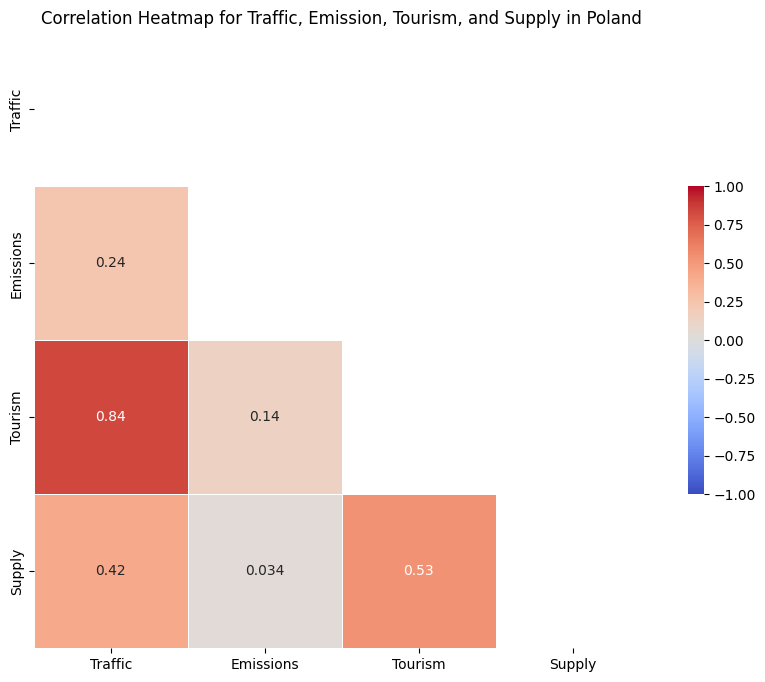

In [302]:
# Merge the dataframes based on the TIME_PERIOD column
merged_FR = traffic_FR[['TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Traffic'})
merged_FR = pd.merge(merged_FR, emissions_FR[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Emissions'})
merged_FR = pd.merge(merged_FR, tourism_FR[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Tourism'})
merged_FR = pd.merge(merged_FR, supply_FR[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Supply'})

corr = merged_FR.drop(columns='TIME_PERIOD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap for Traffic, Emission, Tourism, and Supply in Poland')
plt.show()


### Bulgaria

In [303]:
traffic_BG = traffic[
    (traffic['geo'] == 'BG') &
    (traffic['tra_meas'] == 'PAS_BRD') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

emissions_BG = emissions[
    (emissions['geo'] == 'BG_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

tourism_BG = tourism[
    (tourism['geo'] == 'BG') &
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02')
]

supply_BG = supply[
    (supply['geo'] == 'BG') &
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02')
]

In [304]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    subplot_titles=('Air passenger vs Emissions', 'Air passenger vs Tourism', 'Air passenger vs Freight'),
                    vertical_spacing=0.1,
                    specs=[[{'secondary_y': True}],
                           [{'secondary_y': True}],
                           [{'secondary_y': True}]])

# For Traffic vs Emissions
fig.add_trace(go.Scatter(
    x=traffic_BG['TIME_PERIOD'],
    y=traffic_BG['OBS_VALUE'],
    name='Air passenger',
    line=dict(color='blue'),
), row=1, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=emissions_BG['TIME_PERIOD'],
    y=emissions_BG['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
), row=1, col=1, secondary_y=False)

# For Traffic vs Tourism
fig.add_trace(go.Scatter(
    x=traffic_BG['TIME_PERIOD'],
    y=traffic_BG['OBS_VALUE'],
    showlegend=False,  
    line=dict(color='blue'),
), row=2, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=tourism_BG['TIME_PERIOD'],
    y=tourism_BG['OBS_VALUE'],
    name='Tourism',
    line=dict(color='red'),
), row=2, col=1, secondary_y=False)

# For Traffic vs Freight
fig.add_trace(go.Scatter(
    x=traffic_BG['TIME_PERIOD'],
    y=traffic_BG['OBS_VALUE'],
    showlegend=False, 
    line=dict(color='blue'),
), row=3, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=supply_BG['TIME_PERIOD'],
    y=supply_BG['OBS_VALUE'],
    name='Freight NL',
    line=dict(color='black'),
), row=3, col=1, secondary_y=False)

fig.update_layout(
    title_text='Impact of COVID-19 on Different Sectors in Bulgaria',
    height=900 
)

fig.add_vline(x='2020-02', line_width=2, line_color='red', line_dash='dot')
fig.add_annotation(
    dict(
        x='2020-02-01',
        y=1.05,  
        xref='x',
        yref='paper',
        text='Begin COVID-19',  
        showarrow=False,
        font=dict(
            family='Courier New, monospace',
            size=16,
            color='red'
        ),
        ax=0,  
        ay=0
    )
)

fig.show()


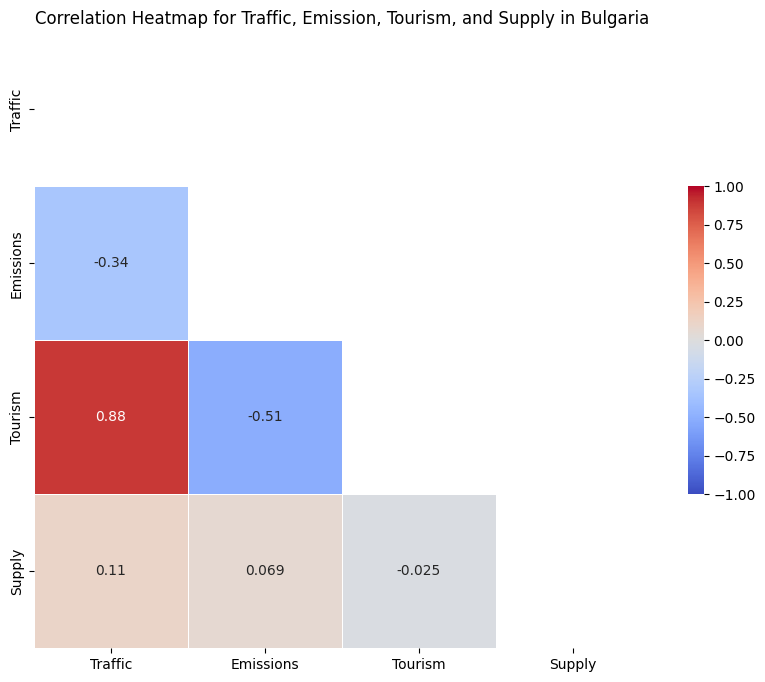

In [305]:
# Merge the dataframes based on the TIME_PERIOD column
merged_BG = traffic_BG[['TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Traffic'})
merged_BG = pd.merge(merged_BG, emissions_BG[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Emissions'})
merged_BG = pd.merge(merged_BG, tourism_BG[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Tourism'})
merged_BG = pd.merge(merged_BG, supply_BG[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Supply'})

corr = merged_BG.drop(columns='TIME_PERIOD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap for Traffic, Emission, Tourism, and Supply in Bulgaria')
plt.show()


## Clustering

In [323]:
# First, let's rename the 'OBS_VALUE' columns in each dataframe for clarity
traffic = traffic.rename(columns={'OBS_VALUE': 'Traffic'})
emissions = emissions.rename(columns={'OBS_VALUE': 'Emissions'})
tourism = tourism.rename(columns={'OBS_VALUE': 'Tourism'})
supply = supply.rename(columns={'OBS_VALUE': 'Supply'})

# Filter datasets based on your criteria (but without the 'geo' condition)
traffic_filtered = traffic[
    (traffic['tra_meas'] == 'PAS_BRD') &
    (traffic['TIME_PERIOD'] >= '2019-02') & 
    (traffic['TIME_PERIOD'] <= '2023-03')                   
]

emissions_filtered = emissions[
    (emissions['TIME_PERIOD'] >= '2019-02') &
    (emissions['TIME_PERIOD'] <= '2023-03')
]

tourism_filtered = tourism[
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02') &
    (tourism['TIME_PERIOD'] <= '2023-03')
]

supply_filtered = supply[
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02') &
    (supply['TIME_PERIOD'] <= '2023-03')
]

# Merge the dataframes on 'TIME_PERIOD'
merged_data = pd.merge(traffic_filtered[['TIME_PERIOD', 'geo', 'Traffic']], 
                       emissions_filtered[['TIME_PERIOD', 'geo', 'Emissions']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

merged_data = pd.merge(merged_data, 
                       tourism_filtered[['TIME_PERIOD', 'geo', 'Tourism']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

merged_data = pd.merge(merged_data, 
                       supply_filtered[['TIME_PERIOD', 'geo', 'Supply']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

print(merged_data)


     TIME_PERIOD geo    Traffic  Emissions     Tourism   Supply
0        2019-02  AT  2362496.0        NaN  10323988.0  20406.9
1        2019-03  AT  2884515.0        NaN   9246629.0  25965.7
2        2019-04  AT  2993159.0        NaN   5541037.0  25910.5
3        2019-05  AT  3050436.0        NaN   5231195.0  24700.3
4        2019-06  AT  3332670.0        NaN   7976921.0  23749.0
...          ...  ..        ...        ...         ...      ...
3590     2022-11  XK        NaN        NaN     48191.0      NaN
3591     2022-12  XK        NaN        NaN     77133.0      NaN
3592     2023-01  XK        NaN        NaN     59438.0      NaN
3593     2023-02  XK        NaN        NaN     75281.0      NaN
3594     2023-03  XK        NaN        NaN    104445.0      NaN

[3595 rows x 6 columns]


In [324]:
# Define the list of countries
countries = ['NL', 'LU', 'PL', 'BG']

# Adjust for emissions '_CAP' suffix
emissions_filtered['geo'] = emissions_filtered['geo'].str.replace('_CAP', '')
emissions_filtered = emissions_filtered[emissions_filtered['geo'].isin(countries)]

# Now, filter the other datasets based on the countries list
traffic_filtered = traffic_filtered[traffic_filtered['geo'].isin(countries)]
tourism_filtered = tourism_filtered[tourism_filtered['geo'].isin(countries)]
supply_filtered = supply_filtered[supply_filtered['geo'].isin(countries)]


# Now, merge the dataframes based on 'TIME_PERIOD' and 'geo'
merged_data = pd.merge(traffic_filtered[['TIME_PERIOD', 'geo', 'Traffic']], 
                       emissions_filtered[['TIME_PERIOD', 'geo', 'Emissions']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

merged_data = pd.merge(merged_data, 
                       tourism_filtered[['TIME_PERIOD', 'geo', 'Tourism']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

merged_data = pd.merge(merged_data, 
                       supply_filtered[['TIME_PERIOD', 'geo', 'Supply']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

print(merged_data)


    TIME_PERIOD geo  Traffic  Emissions    Tourism   Supply
0       2019-02  BG   537044       28.7   826763.0   2383.7
1       2019-03  BG   618879       26.9   800328.0   2437.1
2       2019-04  BG   678766       21.3   888474.0   2737.6
3       2019-05  BG   879835       16.4  1369430.0   2394.2
4       2019-06  BG  1459266       19.2  3793185.0   2457.9
..          ...  ..      ...        ...        ...      ...
195     2022-11  PL  2876446       24.4  4062227.0  16321.5
196     2022-12  PL  2973753       24.1  3897817.0  17038.8
197     2023-01  PL  2949180       21.4  3831586.0  12926.7
198     2023-02  PL  2834985       24.9  4095277.0  12820.7
199     2023-03  PL  3244453       28.8  4045097.0  21567.2

[200 rows x 6 columns]


/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_39592/3009799372.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

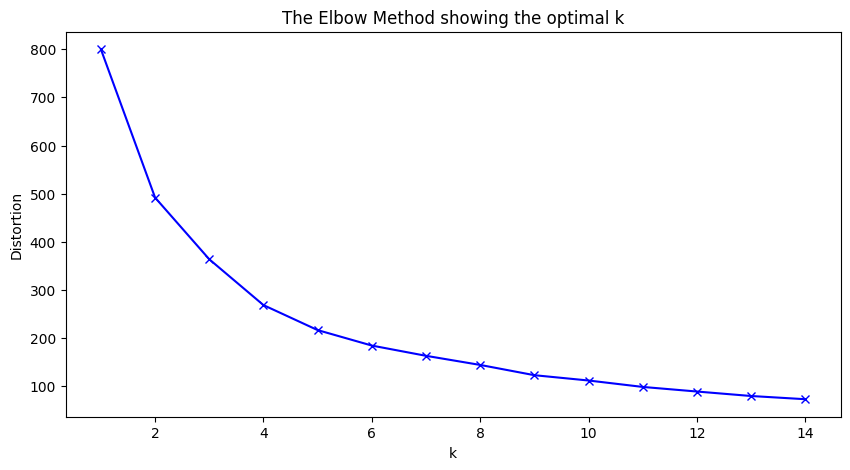

In [333]:
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data[['Traffic', 'Emissions', 'Tourism', 'Supply']])

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

              Traffic  Emissions       Tourism         Supply
Cluster                                                      
0        4.189433e+05  30.839130  6.847330e+05   15976.045652
1        5.502517e+06  24.924242  4.394835e+06  136376.148485
2        2.806259e+06  25.512766  4.407792e+06   11585.748936
3        5.368463e+05  21.308108  7.161149e+05   78275.685135


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_39592/1888150988.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



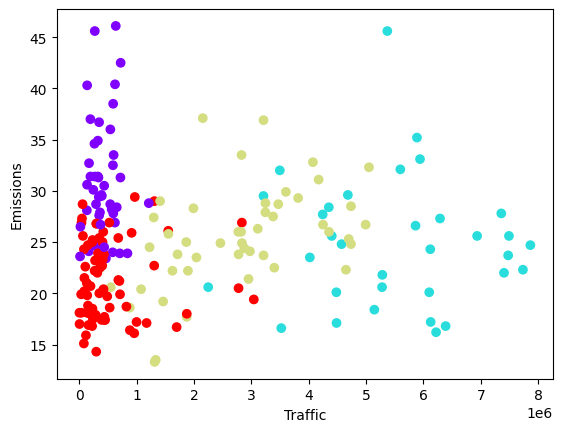

In [334]:
# k = 4 is determined from elbow point above
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
merged_data['Cluster'] = clusters
cluster_analysis = merged_data.groupby('Cluster').mean()
print(cluster_analysis)


plt.scatter(merged_data['Traffic'], merged_data['Emissions'], c=merged_data['Cluster'], cmap='rainbow')
plt.xlabel('Traffic')
plt.ylabel('Emissions')
plt.show()